# imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
import pickle
!pip install gradio
import gradio as gr

# reading data


In [5]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
quality-prediction-in-a-mining-process.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip /content/quality-prediction-in-a-mining-process.zip

Archive:  /content/quality-prediction-in-a-mining-process.zip
replace MiningProcess_Flotation_Plant_Database.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Handling Missing Values

## Visualize Data

In [7]:
df = pd.read_csv('/content/MiningProcess_Flotation_Plant_Database.csv')

# Set the option to display all columns
pd.set_option('display.max_columns', None)
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786","299,163","299,92","299,623","346,794","313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879","299,487","299,71","300,465","330,023","236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397","299,487","299,927","299,707","329,59","225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959","298,045","299,372","298,819","351,453","308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [8]:
df = df.replace(',', '.', regex=True)
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,299.163,299.92,299.623,346.794,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,299.71,300.465,330.023,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,299.927,299.707,329.59,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,298.045,299.372,298.819,351.453,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

## Handling duplicates

In [10]:
for feature in df.columns:
    print(feature,':',df[feature].nunique())

date : 4097
% Iron Feed : 278
% Silica Feed : 293
Starch Flow : 409317
Amina Flow : 319416
Ore Pulp Flow : 180189
Ore Pulp pH : 131143
Ore Pulp Density : 105805
Flotation Column 01 Air Flow : 43675
Flotation Column 02 Air Flow : 80442
Flotation Column 03 Air Flow : 40630
Flotation Column 04 Air Flow : 196006
Flotation Column 05 Air Flow : 194711
Flotation Column 06 Air Flow : 90548
Flotation Column 07 Air Flow : 86819
Flotation Column 01 Level : 299573
Flotation Column 02 Level : 331189
Flotation Column 03 Level : 322315
Flotation Column 04 Level : 309264
Flotation Column 05 Level : 276051
Flotation Column 06 Level : 301502
Flotation Column 07 Level : 295667
% Iron Concentrate : 38696
% Silica Concentrate : 55569


In [ ]:
df.duplicated().sum()

1171

In [11]:
df = df.drop_duplicates()

## Convert Data Types

In [ ]:
for col in df.columns:
  if col == 'date':
    continue
  df[col] = df[col].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          736282 non-null  object 
 1   % Iron Feed                   736282 non-null  float64
 2   % Silica Feed                 736282 non-null  float64
 3   Starch Flow                   736282 non-null  float64
 4   Amina Flow                    736282 non-null  float64
 5   Ore Pulp Flow                 736282 non-null  float64
 6   Ore Pulp pH                   736282 non-null  float64
 7   Ore Pulp Density              736282 non-null  float64
 8   Flotation Column 01 Air Flow  736282 non-null  float64
 9   Flotation Column 02 Air Flow  736282 non-null  float64
 10  Flotation Column 03 Air Flow  736282 non-null  float64
 11  Flotation Column 04 Air Flow  736282 non-null  float64
 12  Flotation Column 05 Air Flow  736282 non-null  fl

In [14]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


## Drop unnecessary features

In [15]:
df.drop(columns=['date'], inplace=True)

<ipython-input-15-a93a85908bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['date'], inplace=True)


## Check Null Values

In [ ]:
# 1) check null values:
df.isnull().sum()

,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0
Flotation Column 03 Air Flow,0


## Handling Outliers

In [ ]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


In [ ]:
df[(np.abs(stats.zscore(df['Starch Flow'])) < 2)]['Starch Flow'].count()

700895

In [ ]:
df.loc[(np.abs(stats.zscore(df['Starch Flow'])) < 2), 'Starch Flow'].sort_values()

,Starch Flow
95496,437.603295
236587,437.649000
692783,437.659000
358848,437.670000
563365,437.698946
...,...
457421,5301.540000
2581,5301.560000
607010,5301.604333
538778,5301.620000


In [16]:
df_copy = df[(np.abs(stats.zscore(df['Starch Flow'])) < 2)]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700895 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   700895 non-null  float64
 1   % Silica Feed                 700895 non-null  float64
 2   Starch Flow                   700895 non-null  float64
 3   Amina Flow                    700895 non-null  float64
 4   Ore Pulp Flow                 700895 non-null  float64
 5   Ore Pulp pH                   700895 non-null  float64
 6   Ore Pulp Density              700895 non-null  float64
 7   Flotation Column 01 Air Flow  700895 non-null  float64
 8   Flotation Column 02 Air Flow  700895 non-null  float64
 9   Flotation Column 03 Air Flow  700895 non-null  float64
 10  Flotation Column 04 Air Flow  700895 non-null  float64
 11  Flotation Column 05 Air Flow  700895 non-null  float64
 12  Flotation Column 06 Air Flow  700895 non-null  fl

In [ ]:
df_copy.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000
mean,56.347740,14.575059,2915.684788,488.644633,397.592227,9.765349,1.681498,280.474324,277.464491,281.298081,299.465927,299.919346,292.280806,291.036342,519.184098,521.195651,530.403795,419.766607,424.353274,428.958733,420.121951,65.053272,2.320431
std,5.162668,6.790412,1087.186322,90.233149,9.714628,0.382538,0.068200,29.168280,29.855173,28.350652,2.579102,3.628344,29.975256,28.411210,129.897997,126.950423,149.638659,91.331424,83.720120,89.088550,84.389406,1.116142,1.123406
min,42.740000,1.310000,437.603295,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,191.331000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.870000,2140.315000,432.742000,394.277000,9.528895,1.648910,250.298000,250.503000,250.904000,298.312000,298.085000,277.376583,261.999000,416.931000,441.797000,411.503000,356.448000,357.367500,358.154000,356.436000,64.380000,1.440000
50%,56.090000,13.790000,3051.370000,504.405000,399.258000,9.795090,1.698050,299.351000,296.295000,298.705000,299.815000,299.891000,299.487000,299.031000,491.418000,495.473000,493.974000,411.387000,408.276000,423.372000,410.230000,65.210000,1.990000
75%,59.720000,19.550000,3720.105000,553.119000,402.979000,10.033200,1.728580,300.152219,300.710000,300.399000,300.646000,301.778000,303.118000,301.924000,593.785500,594.681000,601.060000,484.637000,483.028000,491.764500,474.956000,65.860000,3.000000
max,65.780000,33.400000,5301.640000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.909000,371.593000,862.272000,828.919000,886.822000,680.359000,675.644000,698.861000,659.900000,68.010000,5.530000


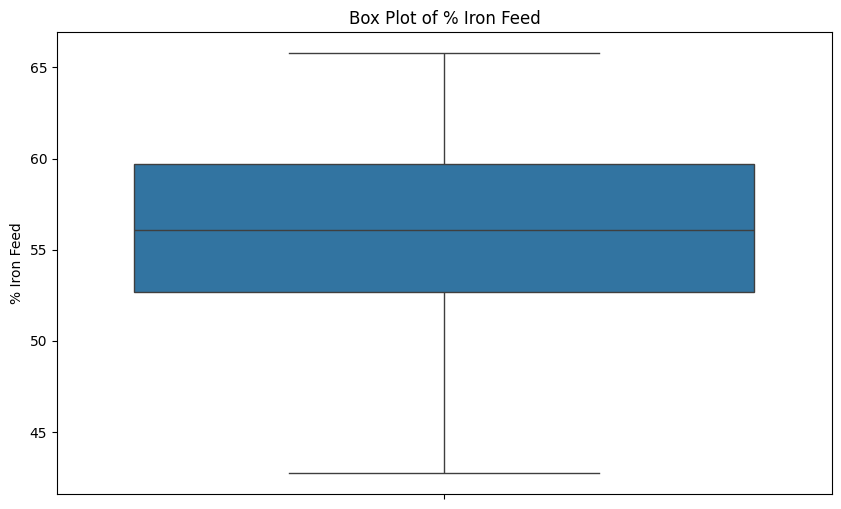

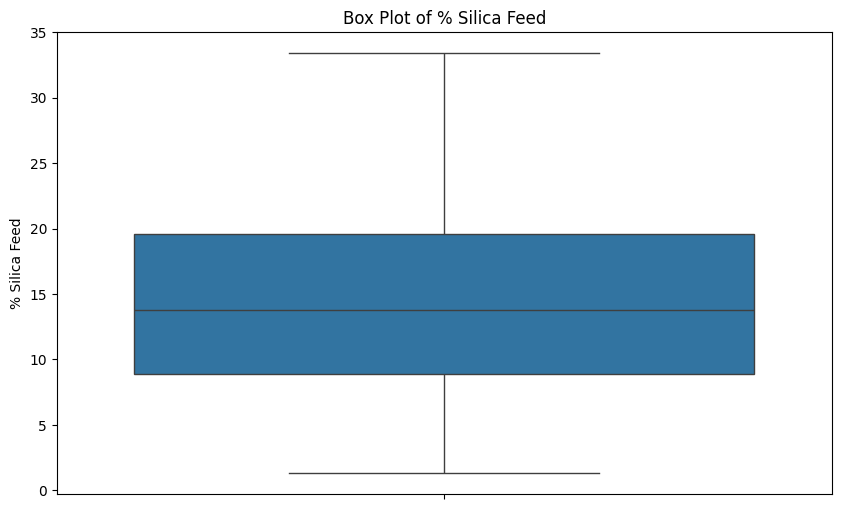

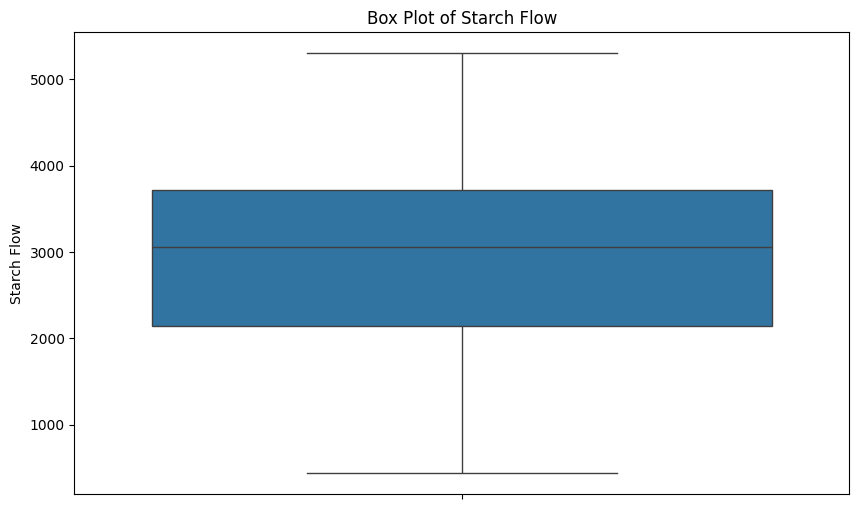

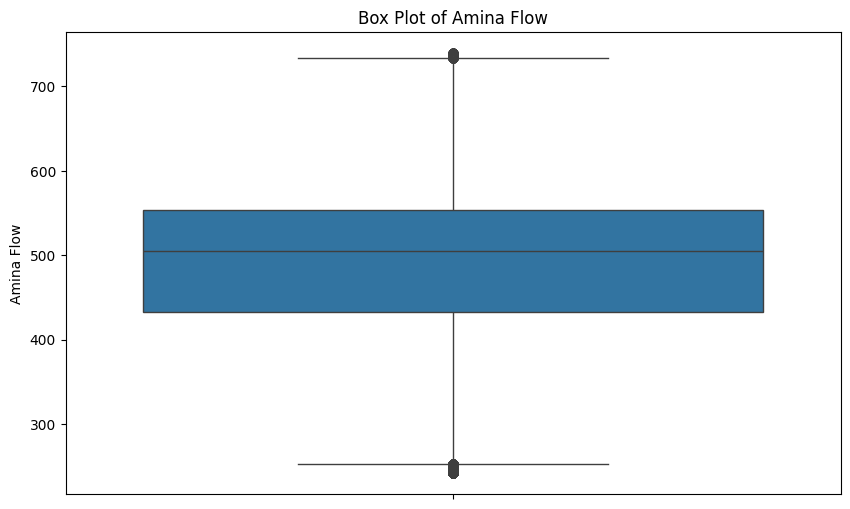

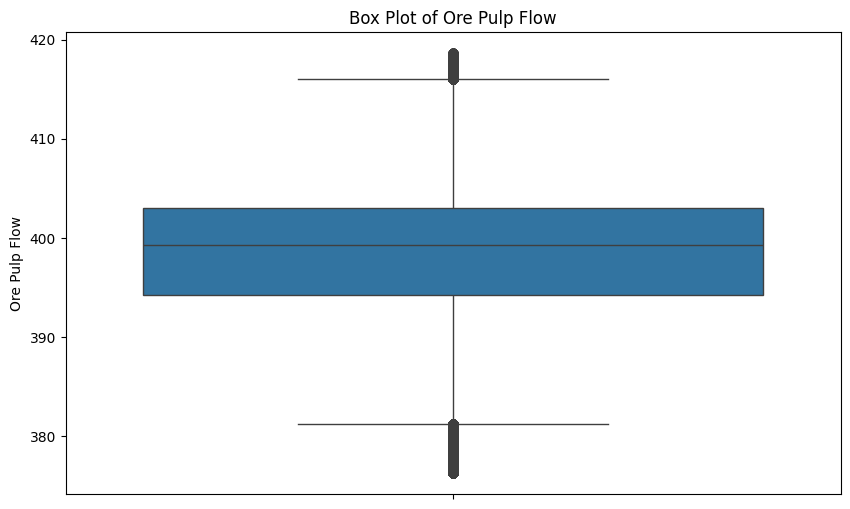

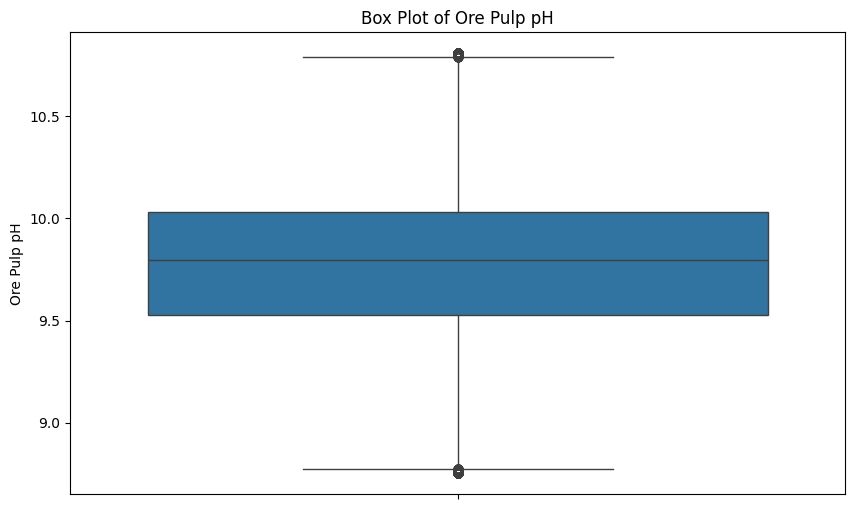

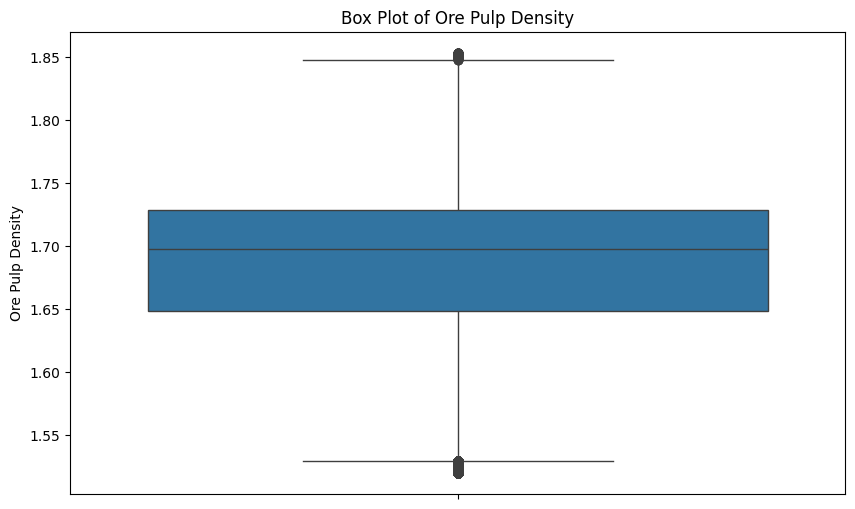

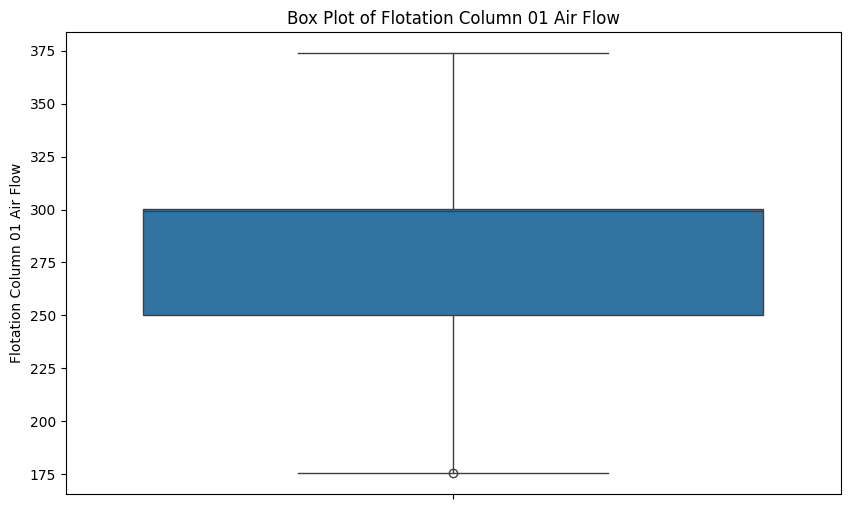

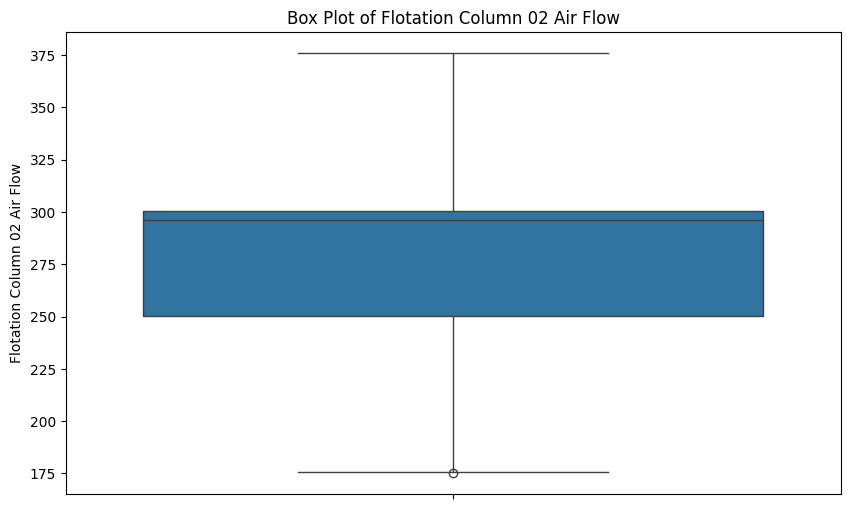

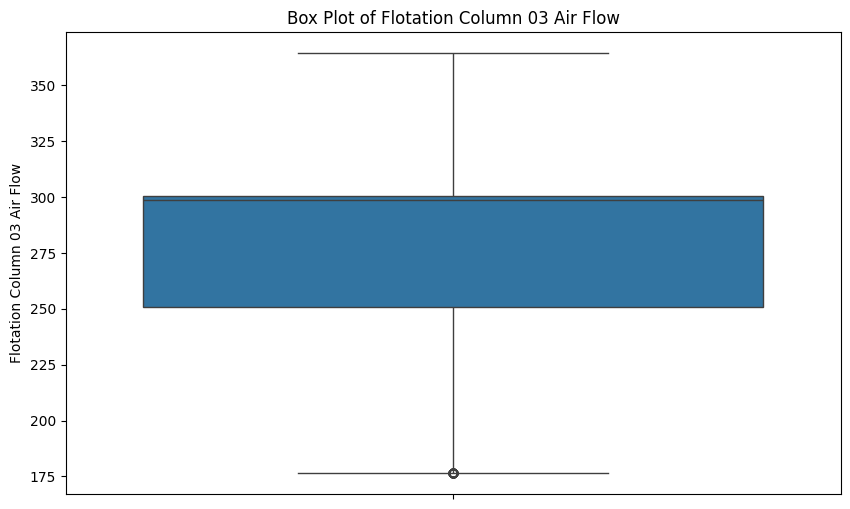

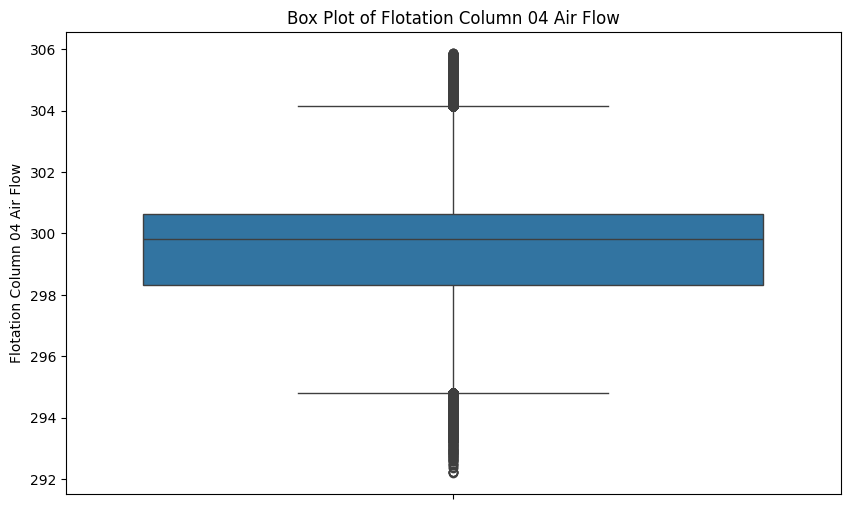

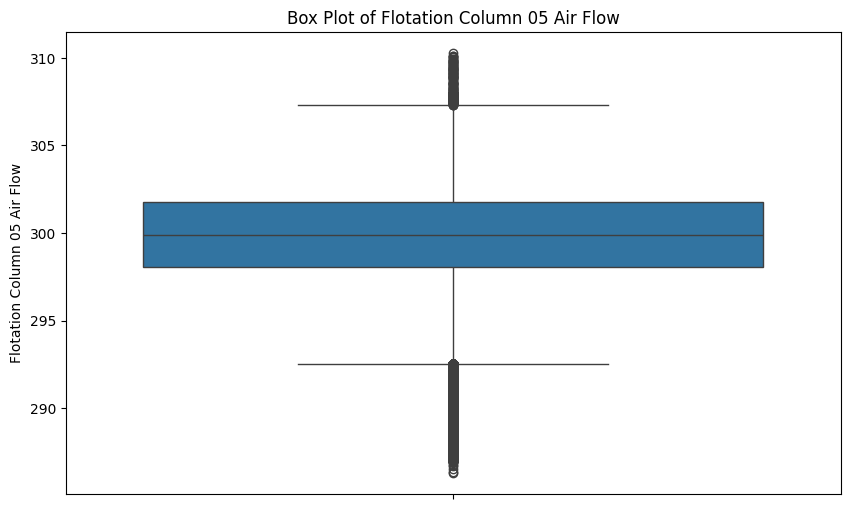

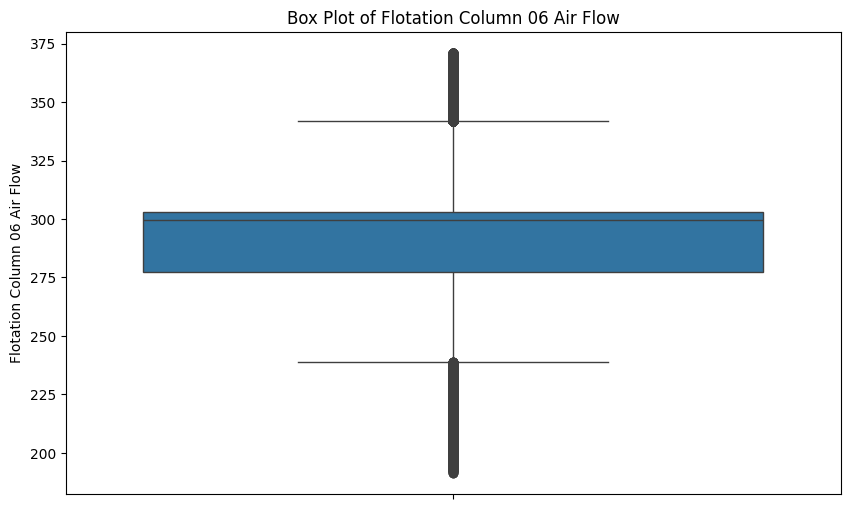

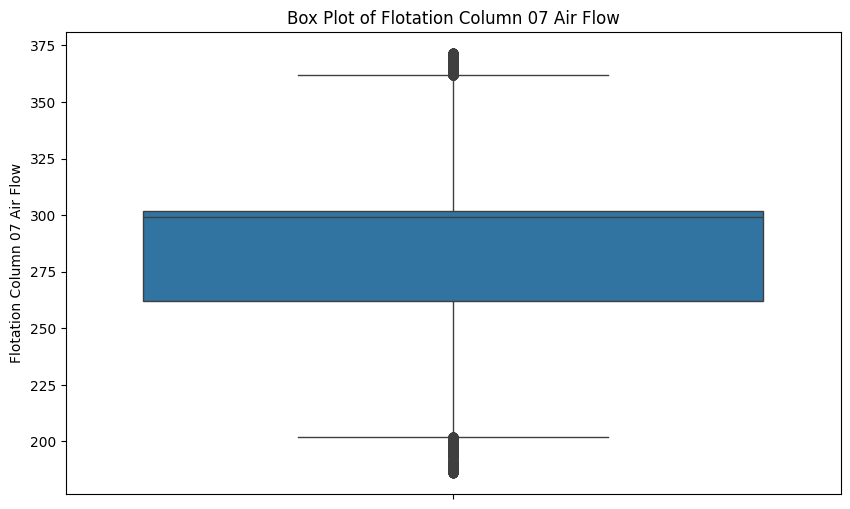

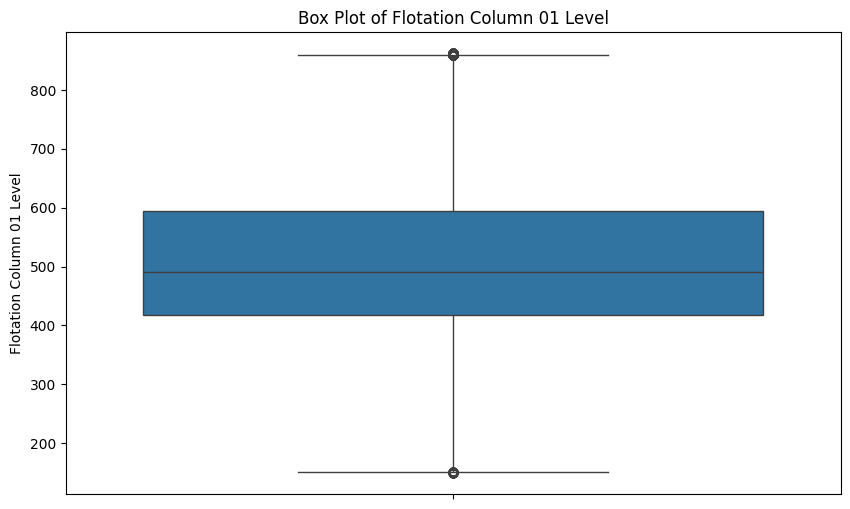

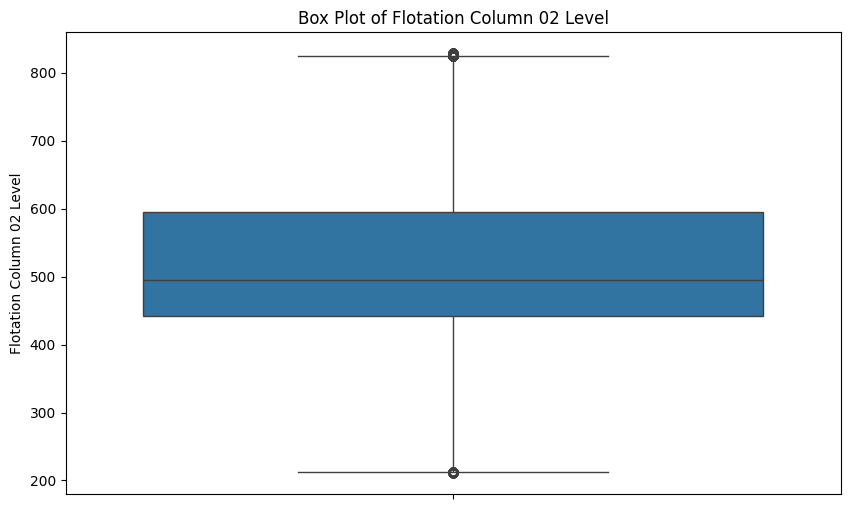

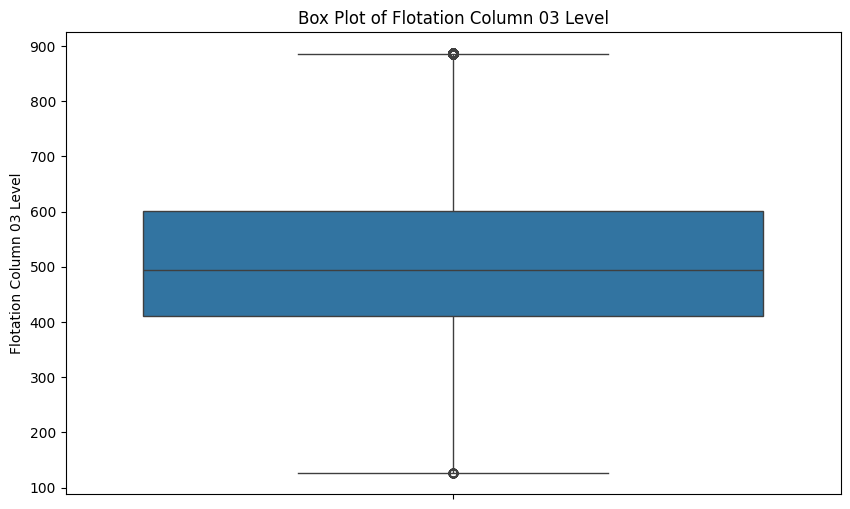

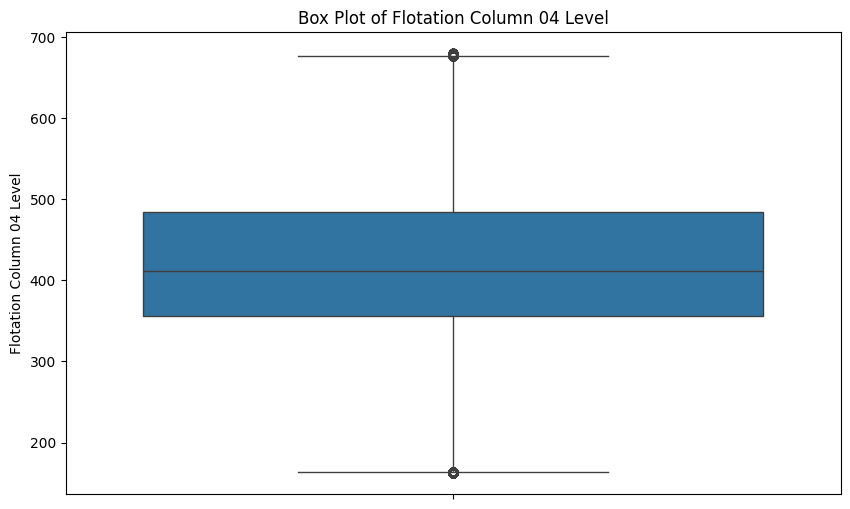

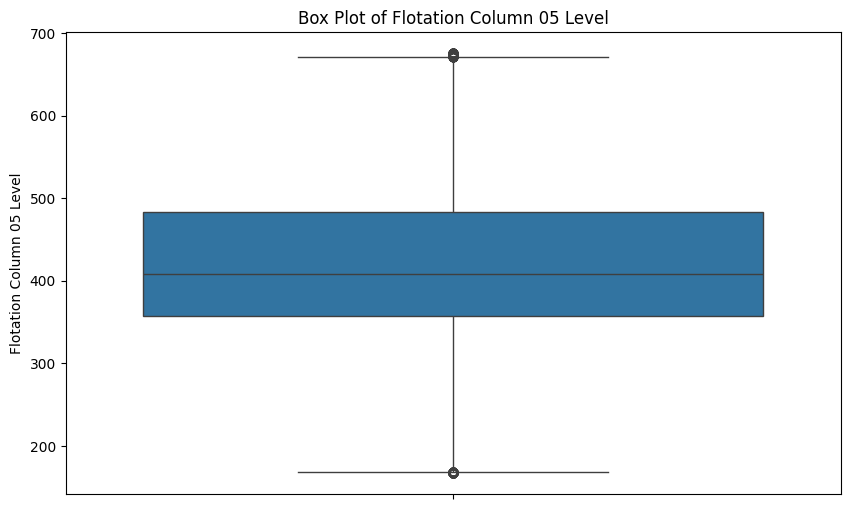

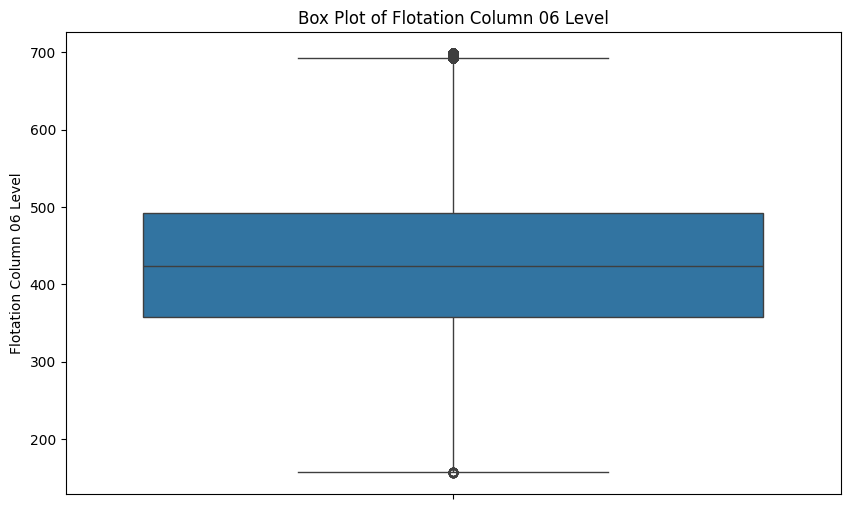

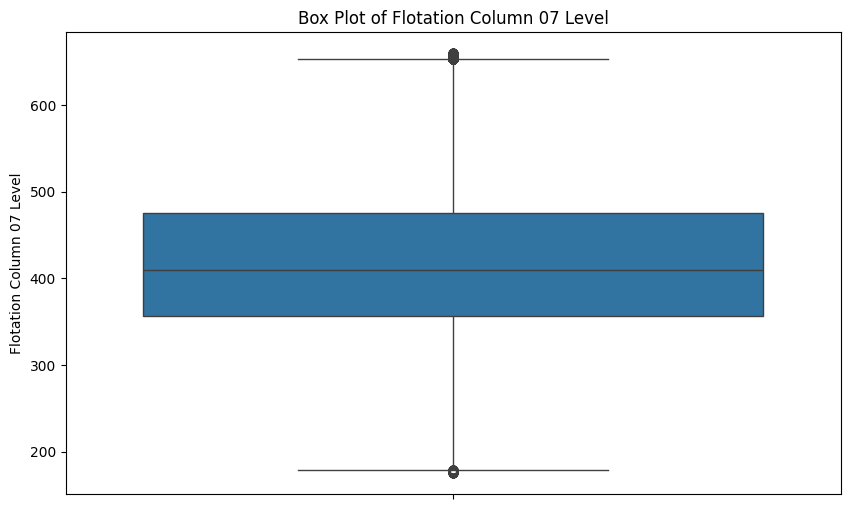

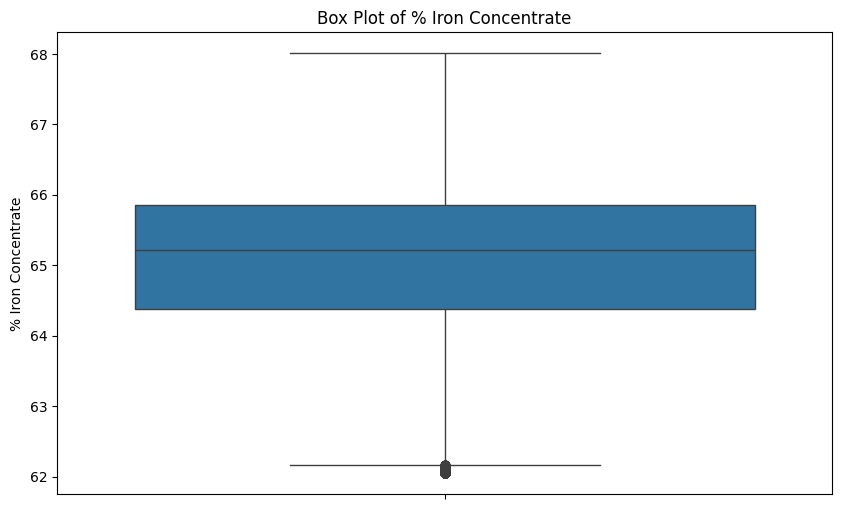

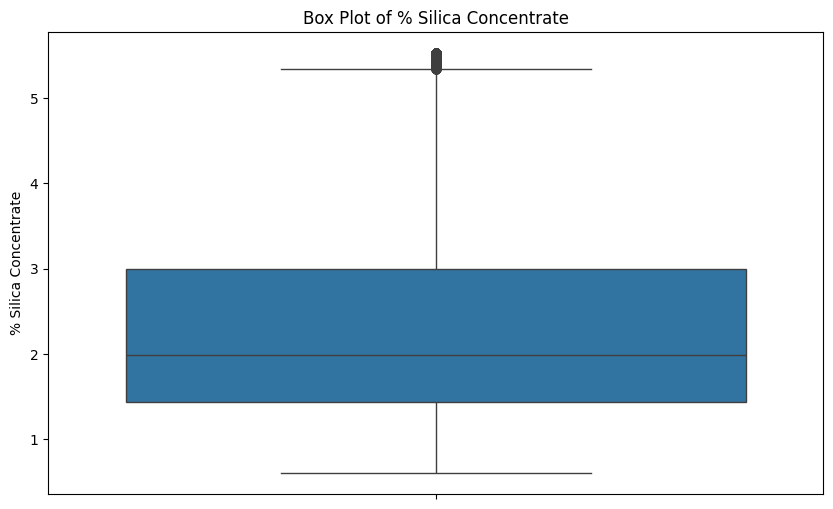

In [ ]:
for column in df_copy.columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each box plot

    sns.boxplot(y=df_copy[column])

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()  # Display the plot

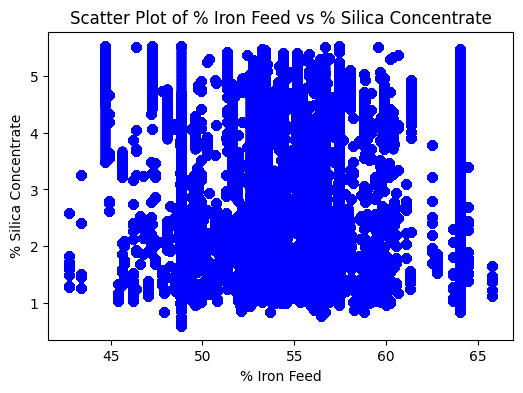

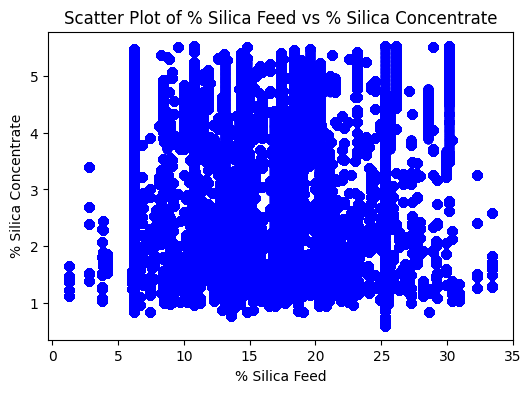

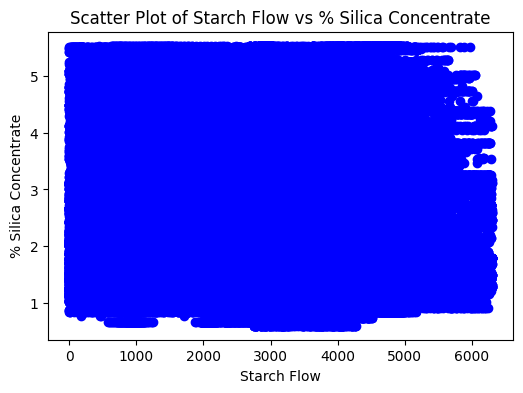

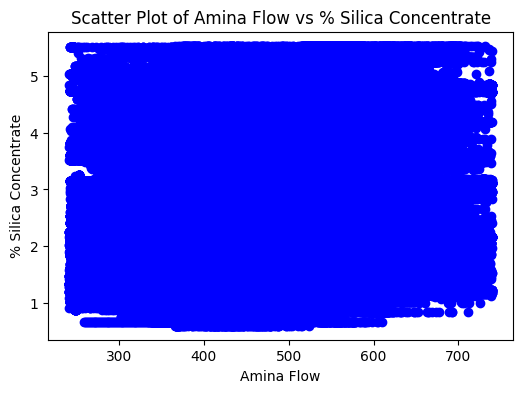

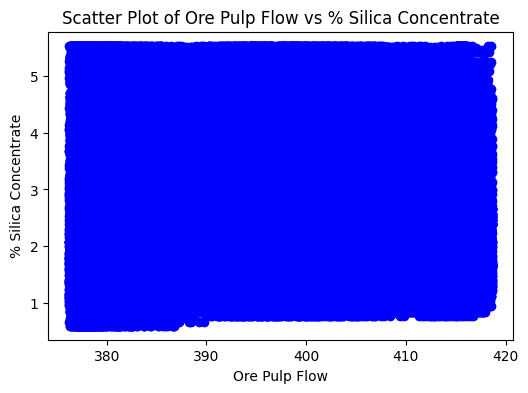

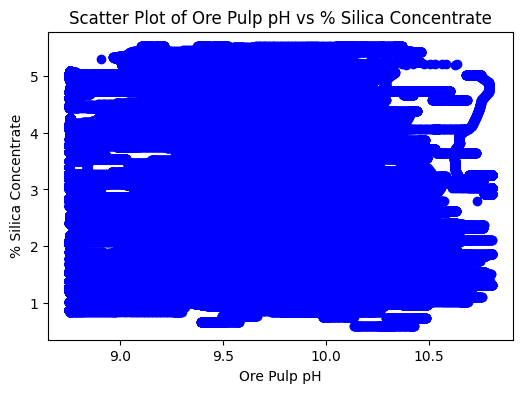

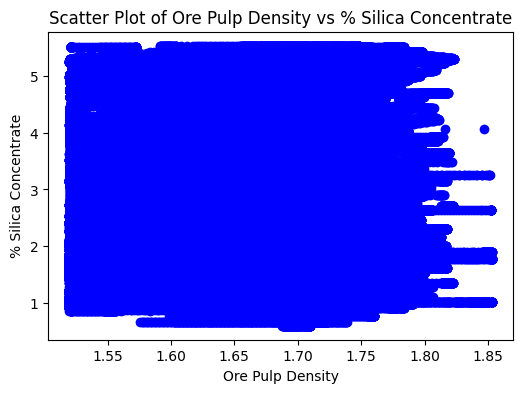

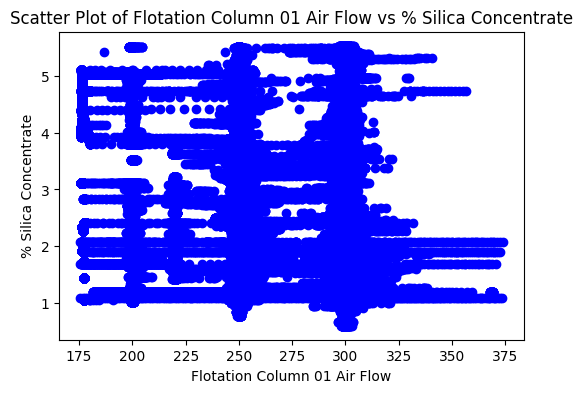

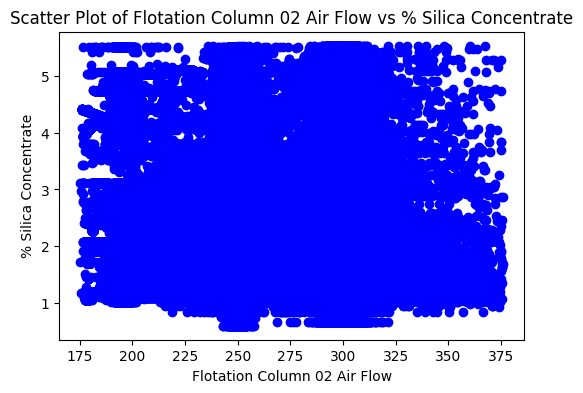

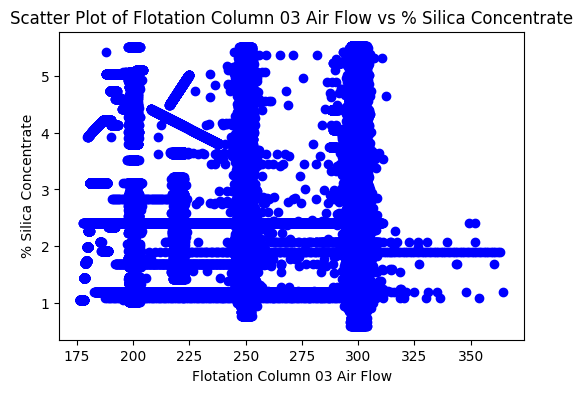

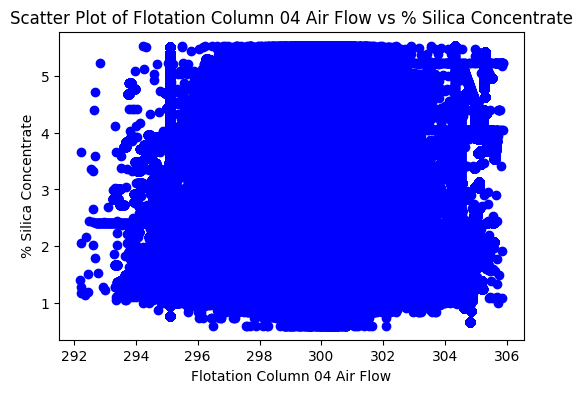

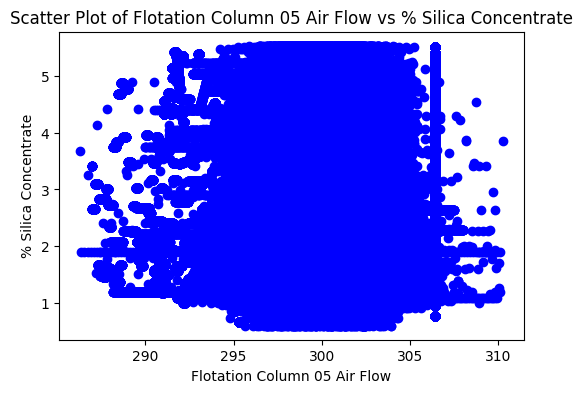

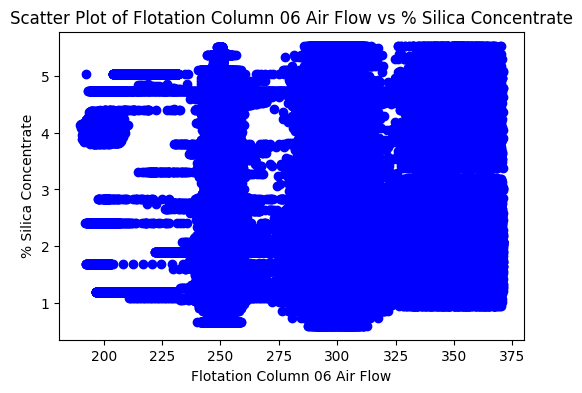

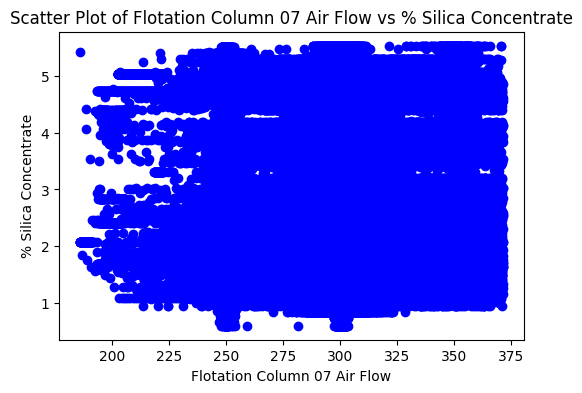

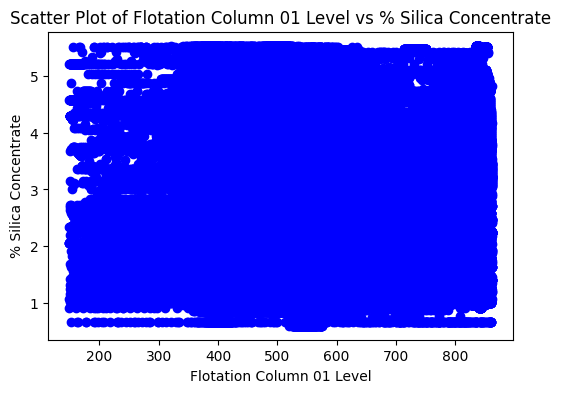

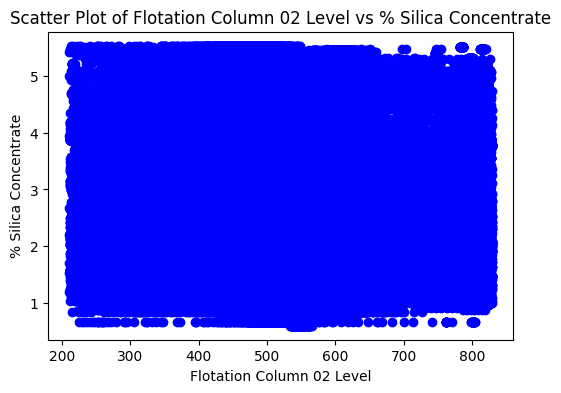

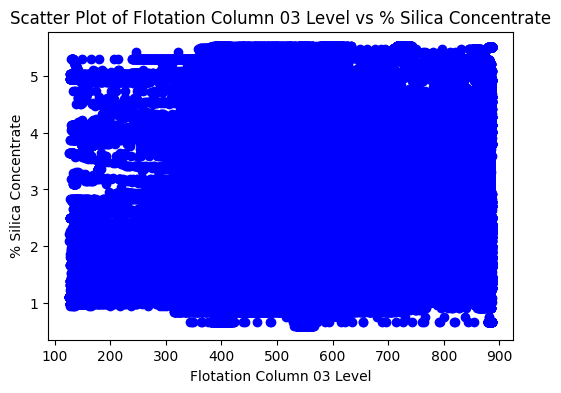

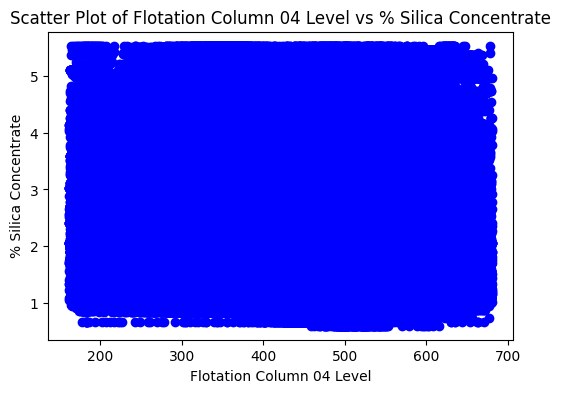

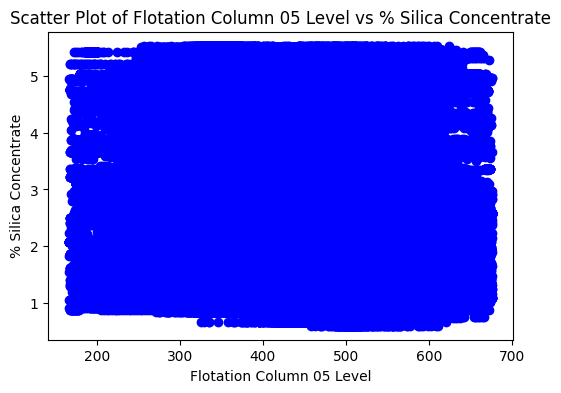

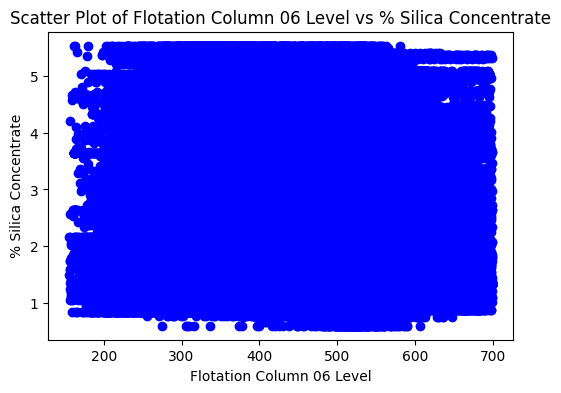

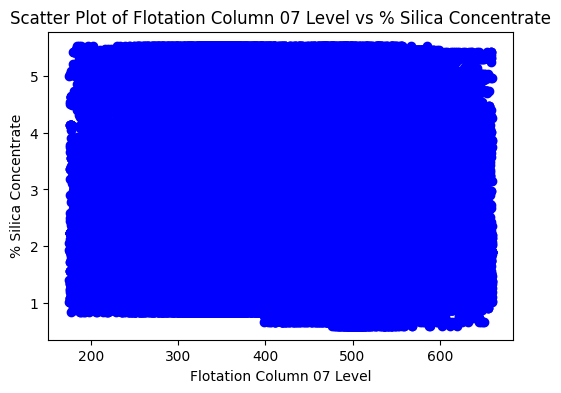

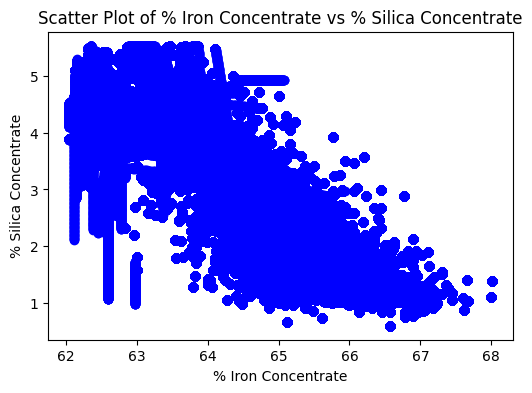

In [17]:
# List of features to plot against the target
features = df_copy.drop(columns=['% Silica Concentrate'])

# Target variable
target = '% Silica Concentrate'

# Create scatter plots
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], color='blue')
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

## Features Selection

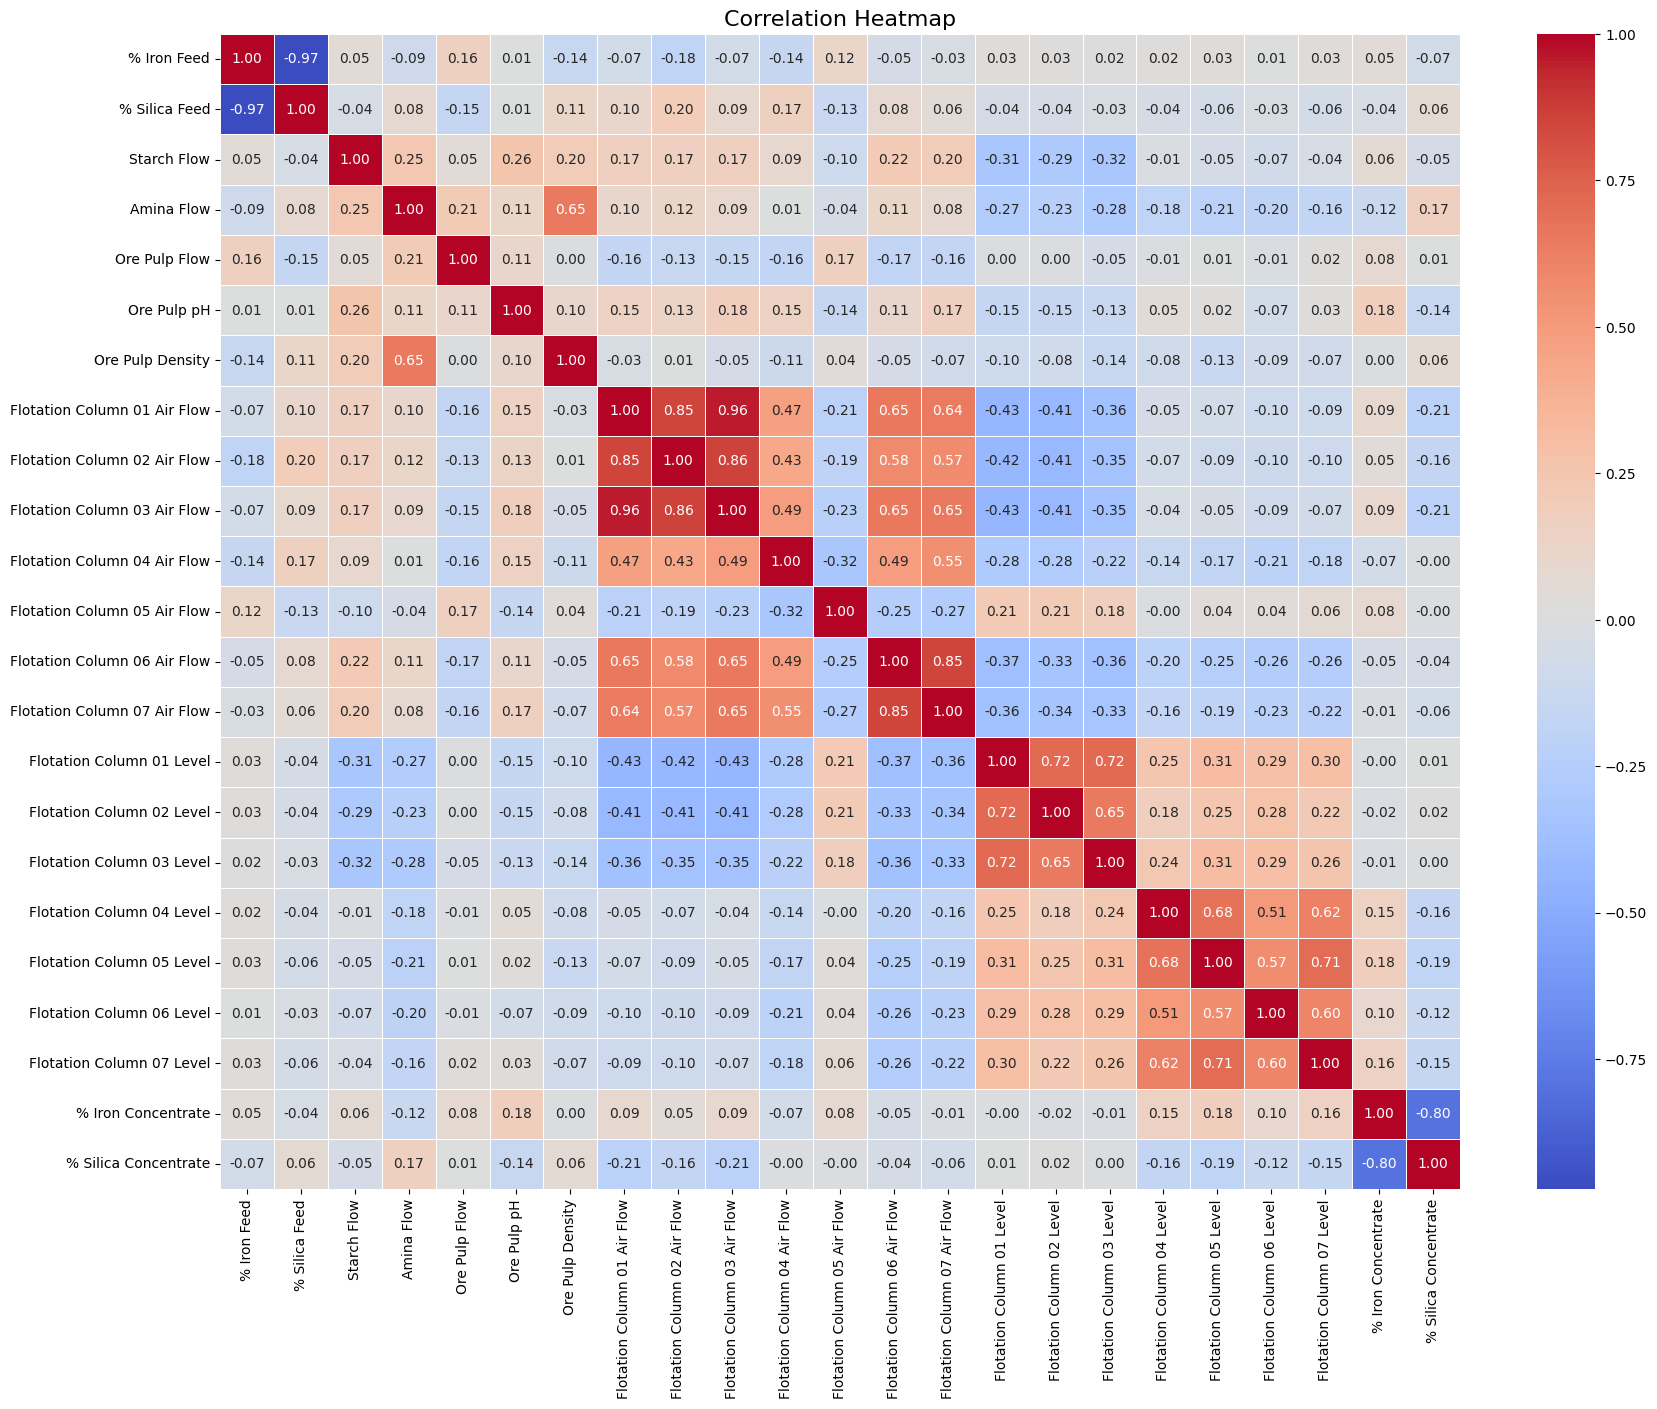

In [ ]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

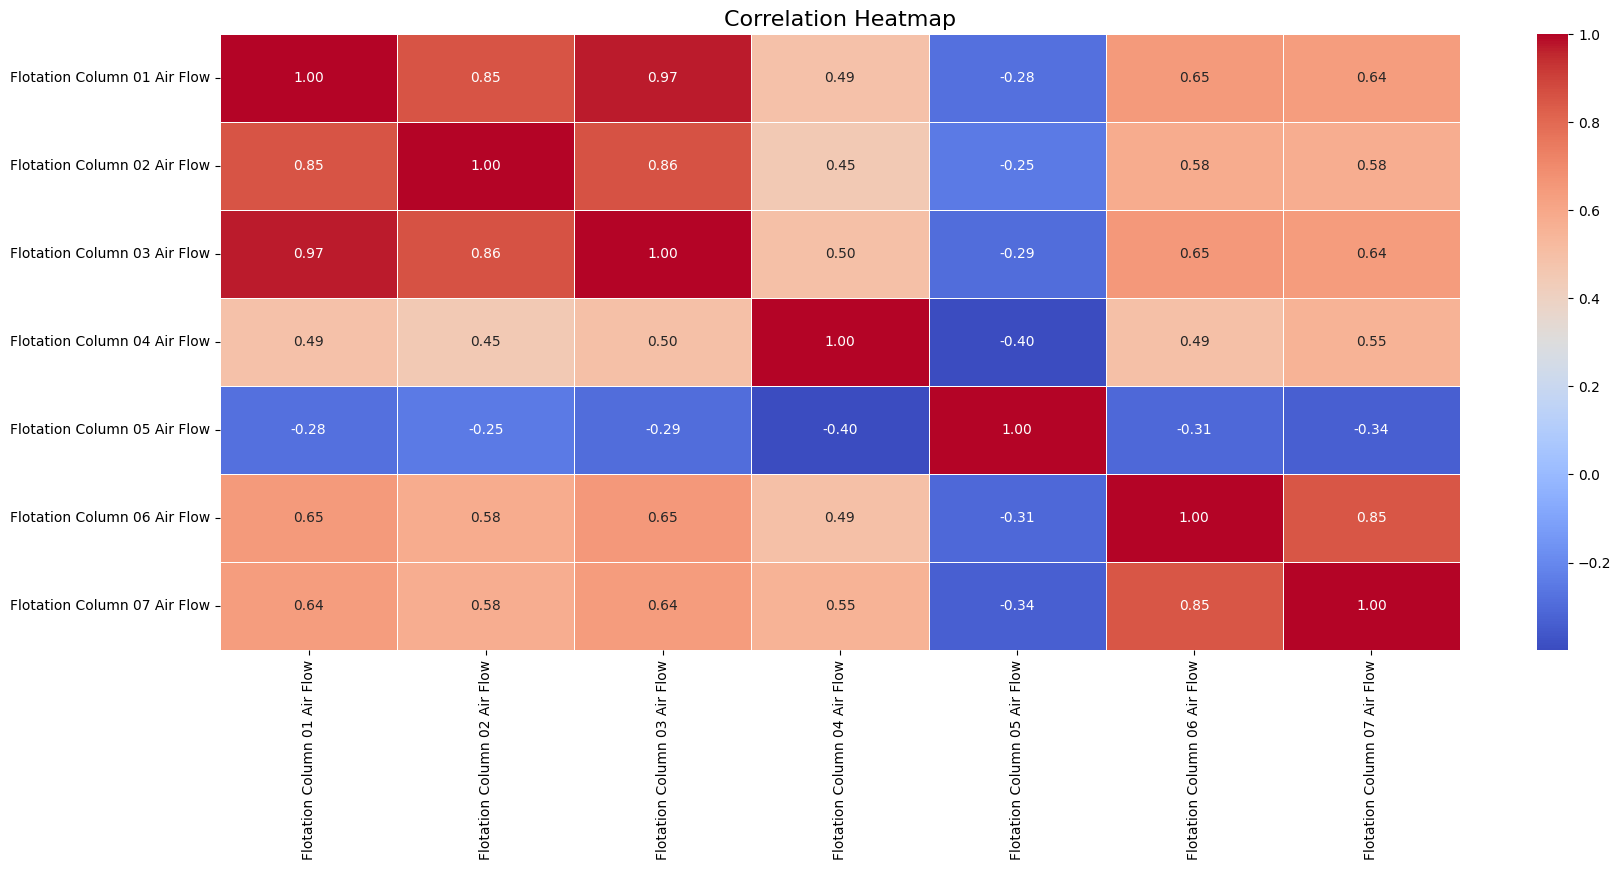

In [ ]:
Air_Flow = df_copy[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow','Flotation Column 05 Air Flow',
            'Flotation Column 06 Air Flow','Flotation Column 07 Air Flow']]
# Compute the correlation matrix
corr_matrix = Air_Flow.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

In [18]:
#Dropping % Iron Concentrate => an output of laboratory analysis => highly cooliner to %Silica
df_copy.drop(columns=['% Iron Concentrate'],inplace=True)

<ipython-input-18-dc95da71303e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns=['% Iron Concentrate'],inplace=True)


In [19]:
# Dropping % Iron Feed => highly cooliner to % Silica feed
df_copy.drop(columns=['% Iron Feed'],inplace=True)

<ipython-input-19-cf4b873366df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns=['% Iron Feed'],inplace=True)


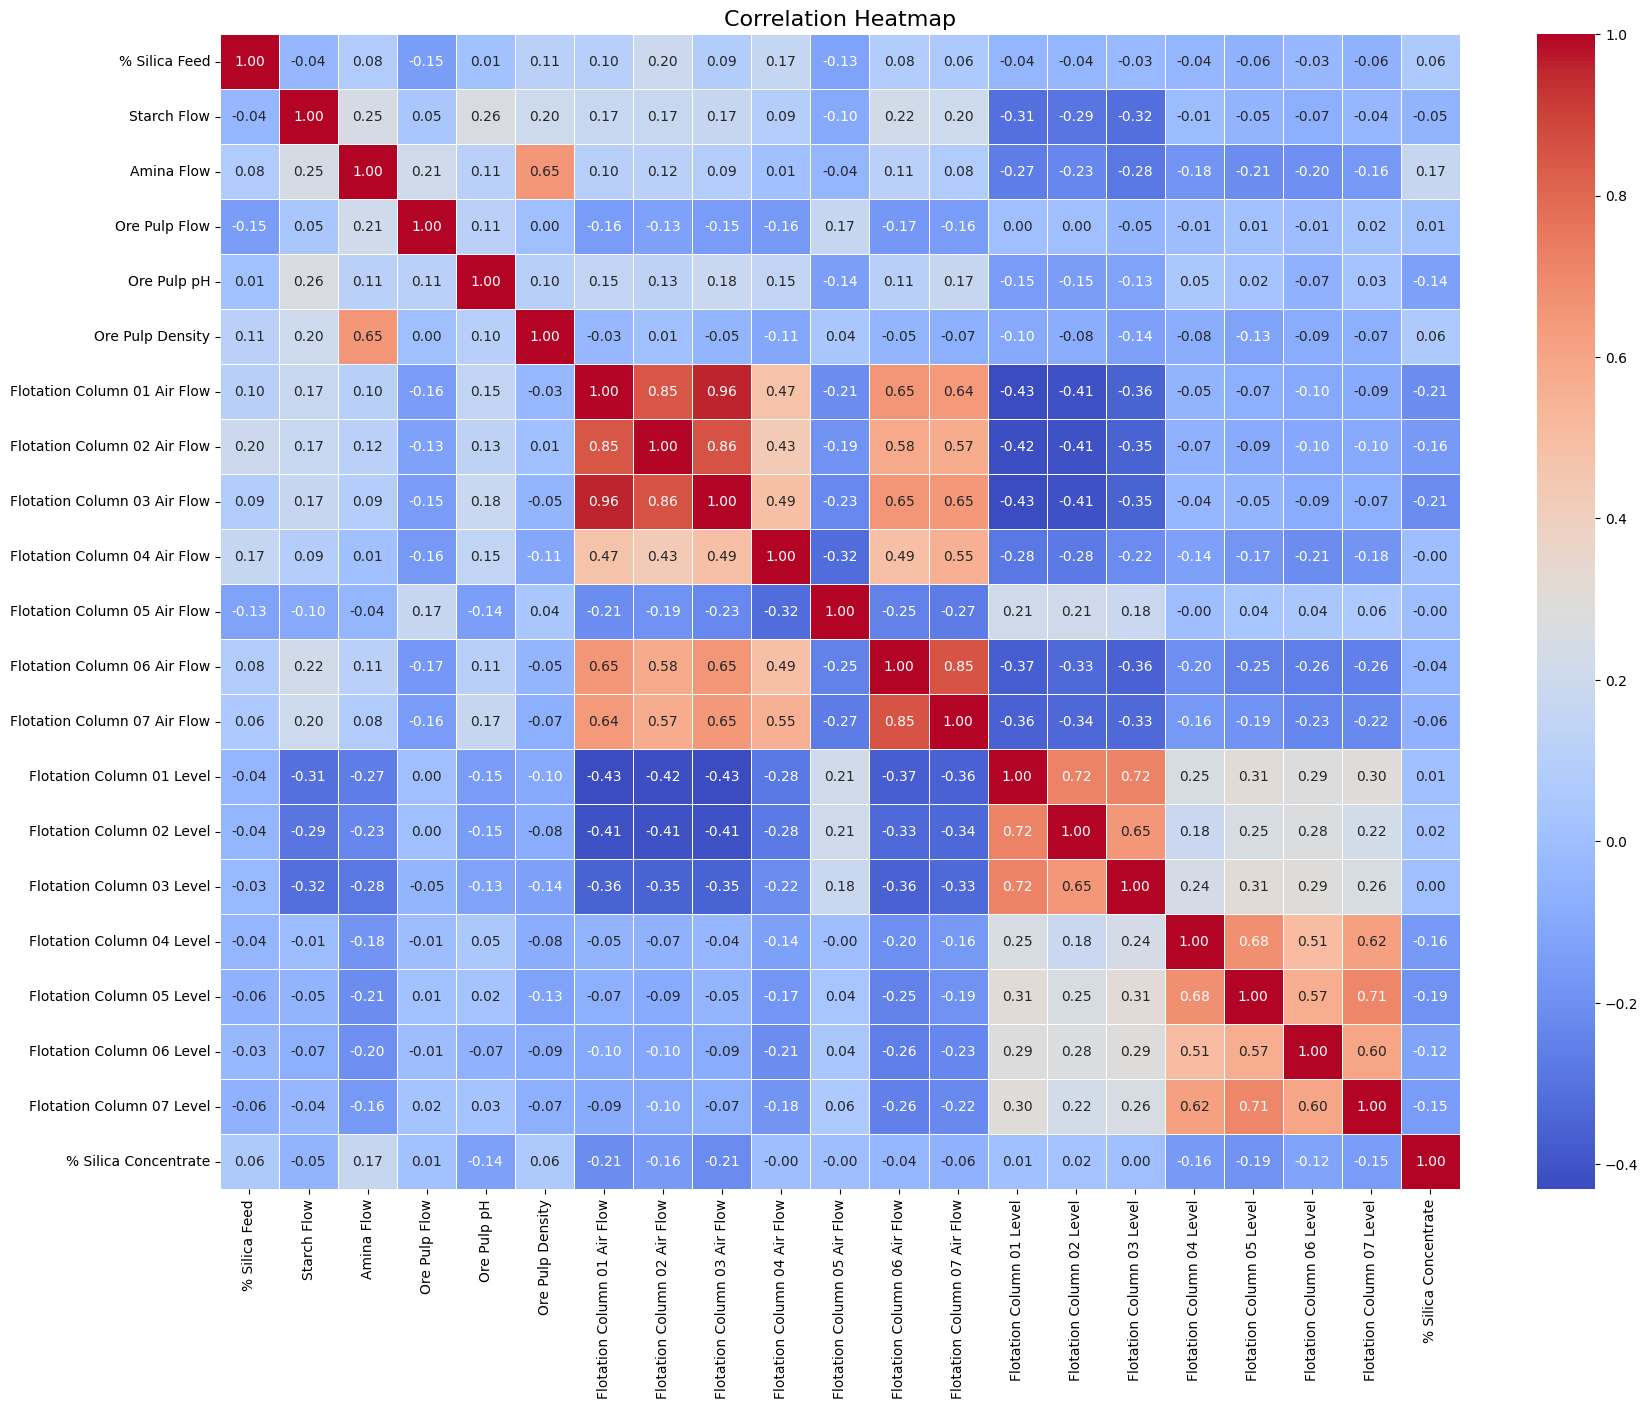

In [ ]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

In [20]:
df_copy.describe()

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000
mean,14.575059,2915.684788,488.644633,397.592227,9.765349,1.681498,280.474324,277.464491,281.298081,299.465927,299.919346,292.280806,291.036342,519.184098,521.195651,530.403795,419.766607,424.353274,428.958733,420.121951,2.320431
std,6.790412,1087.186322,90.233149,9.714628,0.382538,0.068200,29.168280,29.855173,28.350652,2.579102,3.628344,29.975256,28.411210,129.897997,126.950423,149.638659,91.331424,83.720120,89.088550,84.389406,1.123406
min,1.310000,437.603295,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,191.331000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,0.600000
25%,8.870000,2140.315000,432.742000,394.277000,9.528895,1.648910,250.298000,250.503000,250.904000,298.312000,298.085000,277.376583,261.999000,416.931000,441.797000,411.503000,356.448000,357.367500,358.154000,356.436000,1.440000
50%,13.790000,3051.370000,504.405000,399.258000,9.795090,1.698050,299.351000,296.295000,298.705000,299.815000,299.891000,299.487000,299.031000,491.418000,495.473000,493.974000,411.387000,408.276000,423.372000,410.230000,1.990000
75%,19.550000,3720.105000,553.119000,402.979000,10.033200,1.728580,300.152219,300.710000,300.399000,300.646000,301.778000,303.118000,301.924000,593.785500,594.681000,601.060000,484.637000,483.028000,491.764500,474.956000,3.000000
max,33.400000,5301.640000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.909000,371.593000,862.272000,828.919000,886.822000,680.359000,675.644000,698.861000,659.900000,5.530000


In [21]:
df_copy['avg_air_flow'] = df_copy.iloc[:,6:13].mean(axis=1)
df_copy['avg_level'] = df_copy.iloc[:,13:20].mean(axis=1)
df_copy.head()

<ipython-input-21-f68ce8165247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['avg_air_flow'] = df_copy.iloc[:,6:13].mean(axis=1)
<ipython-input-21-f68ce8165247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['avg_level'] = df_copy.iloc[:,13:20].mean(axis=1)


,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate,avg_air_flow,avg_level
0,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31,265.090000,461.548429
1,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31,264.534286,457.548000
2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31,264.120000,456.467000
3,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31,265.359714,448.064429
4,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31,264.663000,448.784714


In [22]:
df_copy.describe()

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate,avg_air_flow,avg_level
count,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000
mean,14.575059,2915.684788,488.644633,397.592227,9.765349,1.681498,280.474324,277.464491,281.298081,299.465927,299.919346,292.280806,291.036342,519.184098,521.195651,530.403795,419.766607,424.353274,428.958733,420.121951,2.320431,288.848474,466.283444
std,6.790412,1087.186322,90.233149,9.714628,0.382538,0.068200,29.168280,29.855173,28.350652,2.579102,3.628344,29.975256,28.411210,129.897997,126.950423,149.638659,91.331424,83.720120,89.088550,84.389406,1.123406,18.472601,77.301571
min,1.310000,437.603295,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,191.331000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,0.600000,218.458979,255.408810
25%,8.870000,2140.315000,432.742000,394.277000,9.528895,1.648910,250.298000,250.503000,250.904000,298.312000,298.085000,277.376583,261.999000,416.931000,441.797000,411.503000,356.448000,357.367500,358.154000,356.436000,1.440000,277.872143,399.392857
50%,13.790000,3051.370000,504.405000,399.258000,9.795090,1.698050,299.351000,296.295000,298.705000,299.815000,299.891000,299.487000,299.031000,491.418000,495.473000,493.974000,411.387000,408.276000,423.372000,410.230000,1.990000,298.687286,455.427286
75%,19.550000,3720.105000,553.119000,402.979000,10.033200,1.728580,300.152219,300.710000,300.399000,300.646000,301.778000,303.118000,301.924000,593.785500,594.681000,601.060000,484.637000,483.028000,491.764500,474.956000,3.000000,300.471286,516.664429
max,33.400000,5301.640000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.909000,371.593000,862.272000,828.919000,886.822000,680.359000,675.644000,698.861000,659.900000,5.530000,330.498688,746.034662


In [23]:
df_copy_copy = df_copy.drop(df_copy.columns[6:20], axis=1)
df_copy_copy

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate,avg_air_flow,avg_level
0,16.98,3019.53,557.434,395.713,10.06640,1.74000,1.31,265.090000,461.548429
1,16.98,3024.41,563.965,397.383,10.06720,1.74000,1.31,264.534286,457.548000
2,16.98,3043.46,568.054,399.668,10.06800,1.74000,1.31,264.120000,456.467000
3,16.98,3047.36,568.665,397.939,10.06890,1.74000,1.31,265.359714,448.064429
4,16.98,3033.69,558.167,400.254,10.06970,1.74000,1.31,264.663000,448.784714
...,...,...,...,...,...,...,...,...,...
737448,23.20,2710.94,441.052,386.570,9.62129,1.65365,1.71,308.617857,496.341714
737449,23.20,2692.01,473.436,384.939,9.62063,1.65352,1.71,295.896714,484.948143
737450,23.20,2692.20,500.488,383.496,9.61874,1.65338,1.71,295.092714,481.131857
737451,23.20,1164.12,491.548,384.976,9.61686,1.65324,1.71,308.616143,490.420000


In [24]:
df_copy_copy.describe()

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate,avg_air_flow,avg_level
count,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000,700895.000000
mean,14.575059,2915.684788,488.644633,397.592227,9.765349,1.681498,2.320431,288.848474,466.283444
std,6.790412,1087.186322,90.233149,9.714628,0.382538,0.068200,1.123406,18.472601,77.301571
min,1.310000,437.603295,241.669000,376.249000,8.753340,1.519820,0.600000,218.458979,255.408810
25%,8.870000,2140.315000,432.742000,394.277000,9.528895,1.648910,1.440000,277.872143,399.392857
50%,13.790000,3051.370000,504.405000,399.258000,9.795090,1.698050,1.990000,298.687286,455.427286
75%,19.550000,3720.105000,553.119000,402.979000,10.033200,1.728580,3.000000,300.471286,516.664429
max,33.400000,5301.640000,739.538000,418.641000,10.808100,1.853250,5.530000,330.498688,746.034662


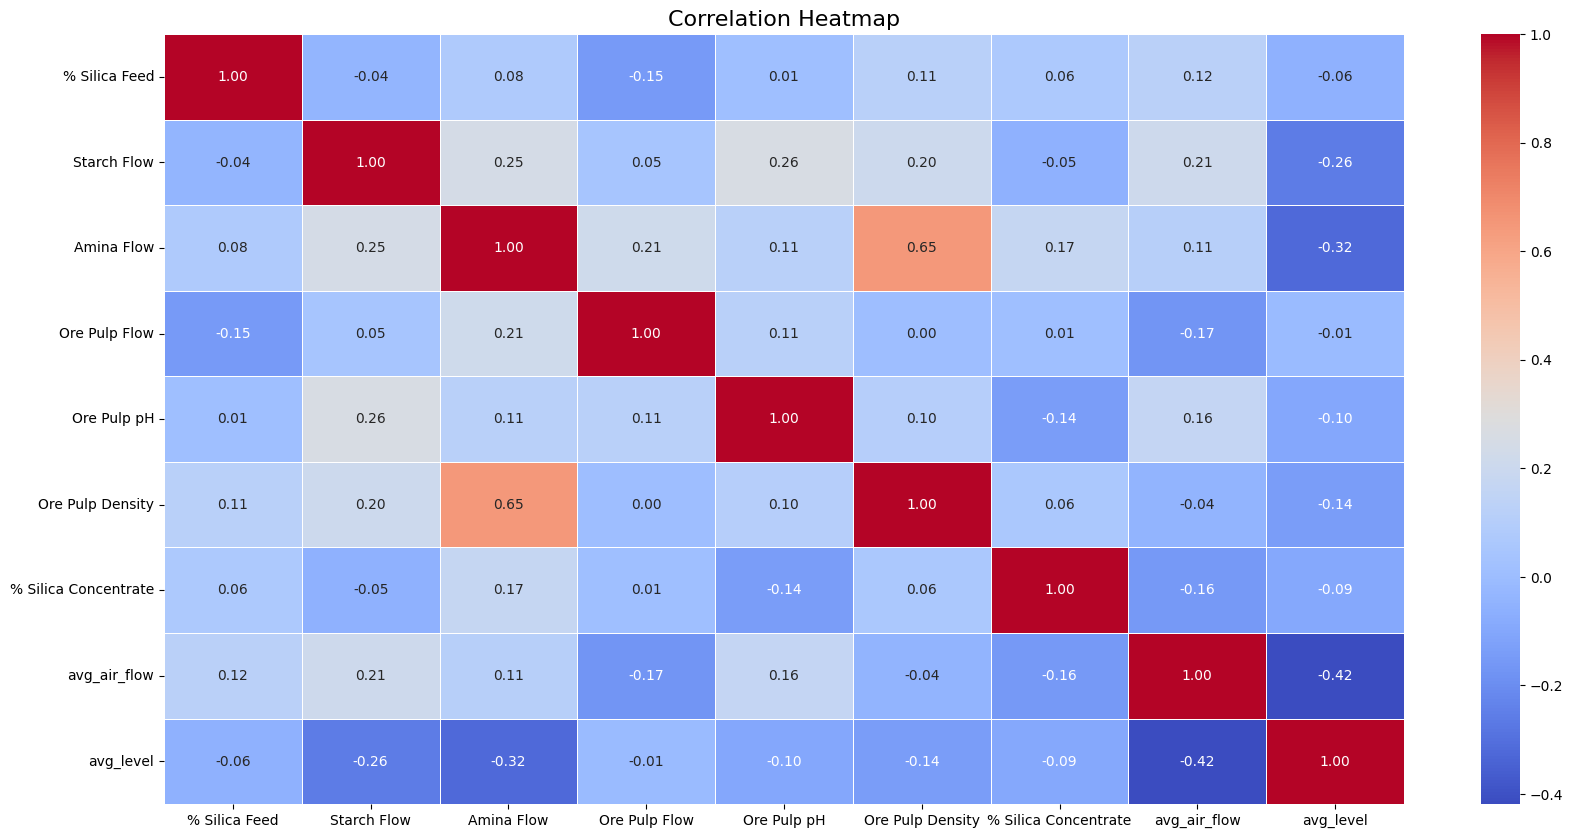

In [25]:
# Compute the correlation matrix
corr_matrix = df_copy_copy.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.show()

## Model

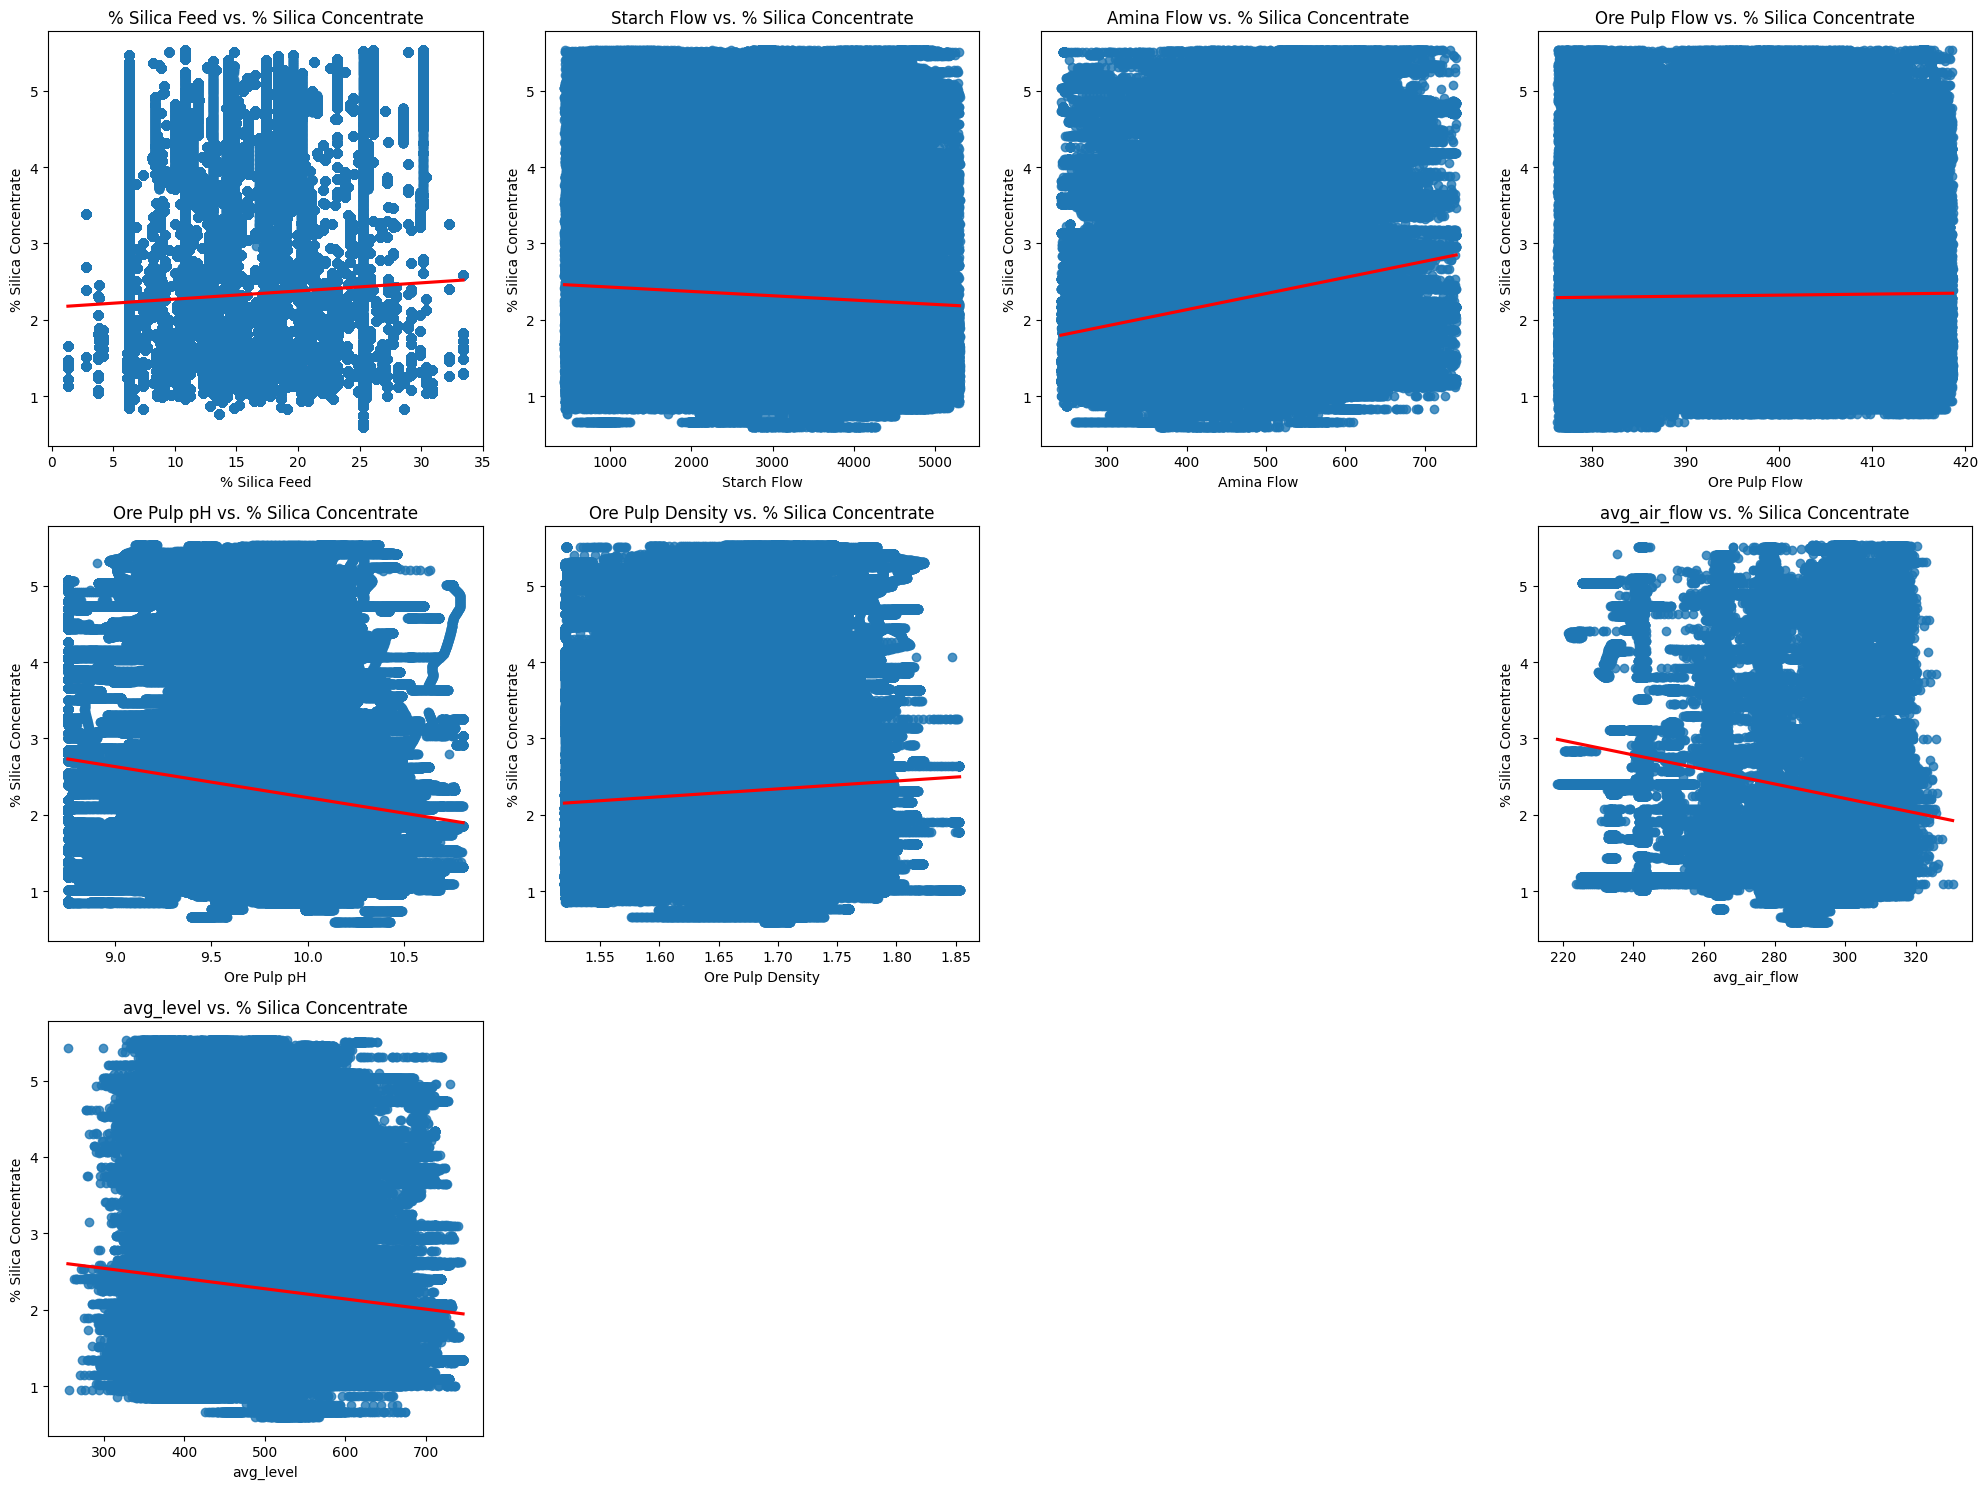

In [ ]:
# Number of features
num_features = df_copy_copy.shape[1]

# Determine the layout of the subplots
cols = 4  # Number of columns in the plot grid
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

# Create subplots
plt.figure(figsize=(20, 5 * rows))

# Loop through each feature
for i, feature_name in enumerate(df_copy_copy.columns):
    if(feature_name == '% Silica Concentrate'):
      continue
    plt.subplot(rows, cols, i + 1)

    # Plot the regression line using seaborn
    sns.regplot(x=df_copy_copy[feature_name], y=df_copy_copy['% Silica Concentrate'], line_kws={"color": "red"})

    # Set plot titles and labels
    plt.title(f'{feature_name} vs. % Silica Concentrate')
    plt.xlabel(feature_name)
    plt.ylabel('% Silica Concentrate')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Decision Tree

In [ ]:
# Example: For classification (change 'target_column' to your actual target column name)
X = df_copy_copy.drop(columns=['% Silica Concentrate'])
y = df_copy_copy['% Silica Concentrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test_scaled)


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


# plt.figure(figsize=(20,10))
# plot_tree(reg, filled=True, feature_names=X.columns)
# plt.show()

Mean Squared Error: 0.15201567258235718
R-squared: 0.8791712406928346


Linear regression

In [ ]:
X = df_copy_copy.drop(columns=['% Silica Concentrate'])
y = df_copy_copy['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.119961892113924
Root Mean Squared Error: 1.0582825199888375
Mean Absolute Error: 0.8413509670385075
R-squared: 0.10980490631900519


Random Forest

In [22]:
# Split the data into features (X) and target (y)
X = df_copy_copy.drop(columns=['% Silica Concentrate'])
y = df_copy_copy['% Silica Concentrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Save the trained rf to a file
with open('quality_mining_rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.0617633367077262
R-squared: 0.9509077766897872


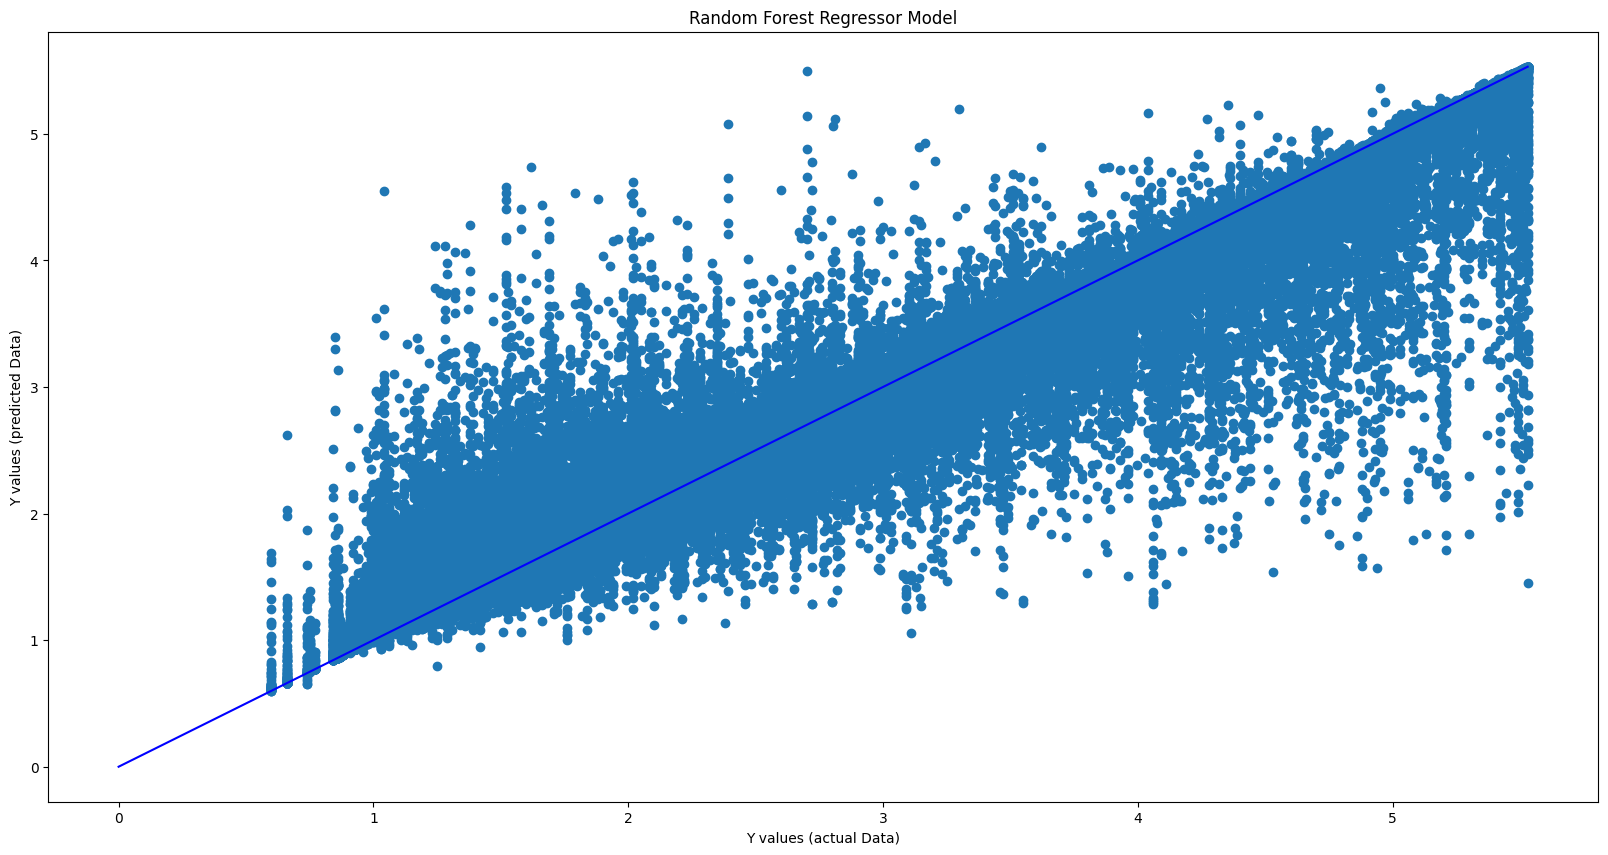

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.set(title = "Random Forest Regressor Model", xlabel = "Y values (actual Data)", ylabel = "Y values (predicted Data)")
ax.scatter(y_test, y_pred)
ax.plot([0, max(y_test)], [0, max(y_pred)], color = 'b')
fig.show();

# Gradio deployment

In [23]:
# Load the trained model
with open('quality_mining_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)
print("Model loaded successfully")

# Load the scaler that was used during training
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("Scaler loaded successfully")

# Define the prediction function
def predict_silica_concentrate(silica_feed, starch_flow, amina_flow, ore_pulp_flow, ore_pulp_ph, ore_pulp_density, avg_air_flow, avg_level):
    try:
        input_data = pd.DataFrame({
            '% Silica Feed': [silica_feed],
            'Starch Flow': [starch_flow],
            'Amina Flow': [amina_flow],
            'Ore Pulp Flow': [ore_pulp_flow],
            'Ore Pulp pH': [ore_pulp_ph],
            'Ore Pulp Density': [ore_pulp_density],
            'avg_air_flow': [avg_air_flow],
            'avg_level': [avg_level]
        })

        # Scale the inputs using the loaded scaler
        input_data_scaled = scaler.transform(input_data)

        # Predict using the trained model
        prediction = model.predict(input_data_scaled)

        debug_info = (f"Inputs: {silica_feed}, {starch_flow}, {amina_flow}, {ore_pulp_flow}, "
                      f"{ore_pulp_ph}, {ore_pulp_density}, {avg_air_flow}, {avg_level}\n"
                      f"Prediction: {prediction[0]}")
        return debug_info
    except Exception as e:
        return str(e)


# Create the Gradio interface using gr.components
interface = gr.Interface(
    fn=predict_silica_concentrate,
    inputs=[
        gr.Number(label="% Silica Feed"),
        gr.Number(label="Starch Flow"),
        gr.Number(label="Amina Flow"),
        gr.Number(label="Ore Pulp Flow"),
        gr.Number(label="Ore Pulp pH"),
        gr.Number(label="Ore Pulp Density"),
        gr.Number(label="avg_air_flow"),
        gr.Number(label="avg_level")
    ],
    outputs="text",  # Change to text to display the debug info
    title="Silica Concentrate Prediction",
    description="Predict the % Silica Concentrate based on the given features."
)

# Launch the interface
interface.launch()

Model loaded successfully
Scaler loaded successfully
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0a6b14a9efbfa60550.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
